# Competition Phase 1

- Group:

- Your student code: 
+ 21110185

# I. Cài đặt mô hình với tập train

### 1. Cài đặt thư viện

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import plot_confusion_matrix

### 2. Tìm hiểu về dữ liệu

In [15]:
data = pd.read_csv("train.csv", sep="|")

### 3. Khám phá tổng quan về dữ liệu

In [16]:
data.head()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
0,5,1054,54.70,7,0,3,0.027514,0.051898,0.241379,0
1,3,108,27.36,5,2,4,0.129630,0.253333,0.357143,0
2,3,1516,62.16,3,10,5,0.008575,0.041003,0.230769,0
3,6,1791,92.31,8,4,4,0.016192,0.051541,0.275862,0
4,5,430,81.53,3,7,2,0.062791,0.189605,0.111111,0


In [17]:
# Loại bỏ các giá trị bị thiếu (NA)
heart_dropna = data.dropna()

In [18]:
print(data.columns)
print(data.head())
data.columns = data.columns.str.strip()  # Loại bỏ dấu cách ở đầu và cuối tên cột


Index(['trustLevel', 'totalScanTimeInSeconds', 'grandTotal', 'lineItemVoids',
       'scansWithoutRegistration', 'quantityModifications',
       'scannedLineItemsPerSecond', 'valuePerSecond',
       'lineItemVoidsPerPosition', 'fraud'],
      dtype='object')
   trustLevel  totalScanTimeInSeconds  grandTotal  lineItemVoids  \
0           5                    1054       54.70              7   
1           3                     108       27.36              5   
2           3                    1516       62.16              3   
3           6                    1791       92.31              8   
4           5                     430       81.53              3   

   scansWithoutRegistration  quantityModifications  scannedLineItemsPerSecond  \
0                         0                      3                   0.027514   
1                         2                      4                   0.129630   
2                        10                      5                   0.008575   
3       

In [19]:
# Chia dữ liệu thành features và target
X = data.drop(columns=['fraud'])
y = data['fraud']

In [20]:
# Chuyển các biến categorical sang dạng one-hot
oh_X = pd.get_dummies(X, drop_first = True)

In [21]:
oh_X.head()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition
0,5,1054,54.70,7,0,3,0.027514,0.051898,0.241379
1,3,108,27.36,5,2,4,0.129630,0.253333,0.357143
2,3,1516,62.16,3,10,5,0.008575,0.041003,0.230769
3,6,1791,92.31,8,4,4,0.016192,0.051541,0.275862
4,5,430,81.53,3,7,2,0.062791,0.189605,0.111111


In [22]:
oh_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1879 entries, 0 to 1878
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   trustLevel                 1879 non-null   int64  
 1   totalScanTimeInSeconds     1879 non-null   int64  
 2   grandTotal                 1879 non-null   float64
 3   lineItemVoids              1879 non-null   int64  
 4   scansWithoutRegistration   1879 non-null   int64  
 5   quantityModifications      1879 non-null   int64  
 6   scannedLineItemsPerSecond  1879 non-null   float64
 7   valuePerSecond             1879 non-null   float64
 8   lineItemVoidsPerPosition   1879 non-null   float64
dtypes: float64(4), int64(5)
memory usage: 132.2 KB


### 4. Chia dữ liệu
Ta chia tỉ lệ tập train và tập test là 70/30

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    oh_X, y, test_size = 0.3, random_state = 1)

print('Labels counts in y:', len(y))
print('Labels counts in y_train:', len(y_train))
print('Labels counts in y_test:', len(y_test))

Labels counts in y: 1879
Labels counts in y_train: 1315
Labels counts in y_test: 564


### 5. Tạo một Random Forest với sklearn

In [24]:
model = RandomForestClassifier(n_estimators=100, random_state=1)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

### 5.1. Độ đo

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Dự đoán nhãn của dữ liệu kiểm tra
y_pred = model.predict(X_test)

# Tính toán các độ đo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# In các độ đo
print("Accuracy on test set:", accuracy)
print("Precision on test set:", precision)
print("Recall on test set:", recall)
print("F1 score on test set:", f1)


Accuracy on test set: 0.9698581560283688
Precision on test set: 0.9090909090909091
Recall on test set: 0.5714285714285714
F1 score on test set: 0.7017543859649122


### 6. Vẽ sơ đồ Confusion Matrix

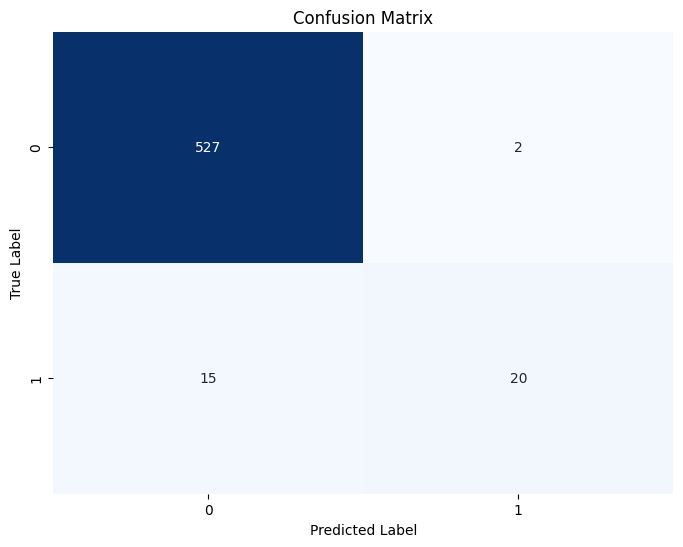

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Dự đoán nhãn của dữ liệu validation
y_pred = model.predict(X_test)

# Tính ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)

# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Dự đoán:
- 527 người: Dự đoán không gian lận là đúng 
- 2   người: Dự đoán gian lận, thực chất là không gian lận
- 15  người: Dự đoán không gian lận, thực chất là gian lận
- 20  người: Dự đoán gian lận là đúng

# II. Chạy mô hình với tập test (phase2)